# illustrates the use of the `proxy` and `analogs` classes

In [1]:
%load_ext watermark

In [2]:
%watermark -vm -a "Nicolas Fauchereau" -d -p numpy,scipy,pandas,matplotlib,basemap

Nicolas Fauchereau 2016-02-18 

CPython 3.5.1
IPython 4.1.1

numpy 1.10.4
scipy 0.17.0
pandas 0.17.1
matplotlib 1.5.1
basemap 1.0.7

compiler   : GCC 4.2.1 (Apple Inc. build 5577)
system     : Darwin
release    : 15.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
try:
    import xarray as xray 
except: 
    import xray
import matplotlib.pyplot as plt

In [4]:
proxies_num = pd.read_excel('../data/ProxiesLIANZSWP.xlsx', sheetname='numerical')

In [5]:
proxies_num.head()

,Site,Lat,Long,Anom,dataset,variable
0,Rarotonga,-21.230000,-159.820000,0.60,ersst,sst
1,Amedee,-22.480000,166.470000,-0.26,ersst,sst
2,Oroko,-43.222615,170.307329,-0.42,ncep,Tmean
3,Greenlaw,-43.006108,171.419497,-0.26,ncep,Tmean
4,Crow,-43.346222,170.998122,-0.62,ncep,Tmean


In [6]:
proxies_cat = pd.read_excel('../data/ProxiesLIANZSWP.xlsx', sheetname='categorical')

In [7]:
proxies_cat.head()

,Site,Lat,Long,Anom,dataset,variable
0,Washington Isl.,4.686322,-160.387482,WB,gpcp,Rain


### import paleopy

In [8]:
import sys

In [9]:
sys.path.insert(0, '../')

In [10]:
from paleopy import proxy 
from paleopy import analogs
from paleopy.plotting import scalar_plot
from paleopy.utils import seasons_params

In [11]:
from paleopy.utils import seasons_params

In [12]:
seasons_params()

{'AMJ': (3, 6),
 'ASO': (3, 10),
 'Apr. - Mar.': (12, 3),
 'Cold Season (Jun. - Nov.)': (6, 11),
 'DJF': (3, 2),
 'FMA': (3, 4),
 'Hydro. year (Jul. - Jun.)': (12, 6),
 'JAS': (3, 9),
 'JFM': (3, 3),
 'JJA': (3, 8),
 'MAM': (3, 5),
 'MJJ': (3, 7),
 'NDJ': (3, 1),
 'OND': (3, 12),
 'SON': (3, 11),
 'Warm Season (Dec. - May)': (6, 5),
 'Year (Jan. - Dec.)': (12, 12)}

### example 1: defines one proxy

In [13]:
djsons = '../jsons/'
pjsons = '../jsons/proxies'

In [14]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          calc_anoms = True, \
          detrend = True)

In [15]:
p.extract_ts()

In [16]:
p.calculate_season()

In [17]:
p.find_analogs()

### now we can print the information about the proxy and the derived information related to the extraction

In [18]:
p.proxy_repr(pprint=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'intercept': -60.96501637775517, 'slope': 0.030535947029886681}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
}


In [19]:
p.analog_years

array([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype=int32)

### `analogs` is an attribute of the proxy: it's a `pandas` dataframe containing info about the analog years 

In [20]:
p.analogs

,sst,anomalies,d_sst,d_anomalies,cat
time,,,,,
1982-02-15,26.849999,0.196222,27.308039,0.638992,WA
1997-02-15,27.416666,0.762889,27.416666,0.747619,WA
1999-02-15,27.466666,0.812889,27.405594,0.736547,WA
2000-02-15,27.373333,0.719556,27.281725,0.612678,WA
2001-02-15,27.356666,0.702889,27.234522,0.565475,WA
2006-02-15,27.373333,0.719556,27.098509,0.429462,WA
2009-02-15,27.539999,0.886222,27.173568,0.504521,WA


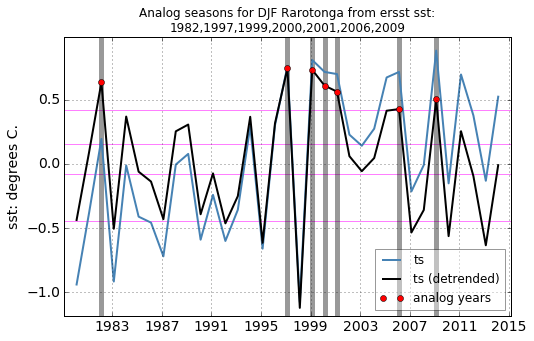

In [21]:
f = p.plot_season_ts()

### Adding `outfile=True` creates the json file containing the proxy information, with filename `self.pfname`

In [22]:
p.proxy_repr(pprint=True, outfile=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'intercept': -60.96501637775517, 'slope': 0.030535947029886681}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
}


In [23]:
!ls -lt ../jsons/proxies/Rarotonga.json

-rw-r--r--  1 nicolasf  staff  612 Feb 18 14:15 ../jsons/proxies/Rarotonga.json


### example 2: loops over the list of proxies parameters contained in the excel file: numerical

In [24]:
for index, row in proxies_num.iterrows():
                
        # initalise a proxy instance, passing all the parameters
        p = proxy(sitename = row.Site,\
                  lon = row.Long,\
                  lat = row.Lat,\
                  djsons = djsons,\
                  pjsons = pjsons,\
                  pfname = row.Site, \
                  dataset = row.dataset,\
                  variable = row.variable,\
                  measurement ='something', \
                  dating_convention = 'something', \
                  season = 'DJF',\
                  value = row.Anom, \
                  calc_anoms = False,\
                  detrend=True)
                                
        # extract the time-series and print the coordinates (passed and extracted)
        p.extract_ts()
        
        print("{}{} --> {}{}: {} km".format(p.sitename, p.coords, p.variable, p.extracted_coords.tolist(), p.distance_point))
        
        # calculates the season statistics
        p.calculate_season()
        
        # find the analog years
        p.find_analogs()
        
        # saves the parameters to file
        p.proxy_repr(outfile=True)
        
        # plot the extracted time-series (raw, detrended) with the analog years
        p.plot_season_ts(fname='./figures/'+p.sitename+".png")

Rarotonga(200.18, -21.23) --> sst[200.0, -22.0]: 87.56368858840081 km
Amedee(166.47, -22.48) --> sst[166.0, -22.0]: 71.98760982961697 km
Oroko(170.307329, -43.222615) --> Tmean[170.0, -42.5]: 84.11208434388203 km
Greenlaw(171.419497, -43.006108) --> Tmean[172.5, -42.5]: 104.57596044098003 km
Crow(170.998122, -43.346222) --> Tmean[170.0, -42.5]: 124.25433418836984 km
Cameron(171.505139, -42.934067) --> Tmean[172.5, -42.5]: 94.46733893961293 km
Avoca(171.405812, -43.043031) --> Tmean[172.5, -42.5]: 107.73975744104352 km
Temple(169.709872, -44.146466) --> Tmean[170.0, -45.0]: 97.58982094997447 km
Hopkins(169.887499, -43.942569) --> Tmean[170.0, -45.0]: 117.84526868991945 km
Turnbull(169.850303, -43.877607) --> Tmean[170.0, -45.0]: 125.29023646426968 km
Jollie(170.33, -43.697778) --> Tmean[170.0, -42.5]: 135.76947455586478 km
Cass(170.315493, -43.652675) --> Tmean[170.0, -42.5]: 130.62568491574098 km
Caples(168.182845, -44.801851) --> Tmean[167.5, -45.0]: 58.084070977038905 km
Fraser(168.1

### loops over the list of proxies parameters contained in the excel file: categorical

In [25]:
for index, row in proxies_cat.iterrows():
                
        # initalise a proxy instance, passing all the parameters
        p = proxy(sitename = row.Site,\
                  lon = row.Long,\
                  lat = row.Lat,\
                  djsons = djsons,\
                  pjsons = pjsons,\
                  pfname = row.Site, \
                  dataset = row.dataset,\
                  variable = row.variable,\
                  measurement ='something', \
                  dating_convention = 'something', \
                  season = 'DJF',\
                  value = row.Anom, 
                  qualitative = True, \
                  calc_anoms = False,\
                  detrend=True)
                                
        # extract the time-series and print the coordinates (passed and extracted)
        p.extract_ts()
        
        print("{}{} --> {}{}: {} km".format(p.sitename, p.coords, p.variable, p.extracted_coords.tolist(), p.distance_point))
        
        # calculates the season statistics
        p.calculate_season()
        
        # find the analog years
        p.find_analogs()
        
        # saves the parameters to file
        p.proxy_repr(outfile=True)
        
        # plot the extracted time-series (raw, detrended) with the analog years
        p.plot_season_ts(fname='./figures/'+p.sitename+".png")

Washington Isl.(199.612518, 4.686322) --> Rain[198.75, 3.75]: 141.2904361997061 km


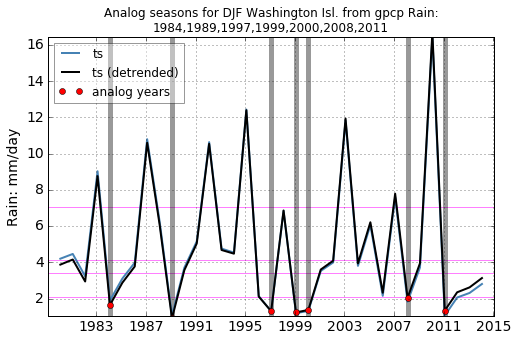

In [26]:
f = p.plot_season_ts(fname=None)

### instantiate the analogs class with the proxy object and the dataset + variable to composite

In [27]:
%%timeit
sst = analogs(p, 'ersst', 'sst').composite()

1 loop, best of 3: 1.27 s per loop


In [28]:
sst = analogs(p, 'ersst', 'sst').composite()

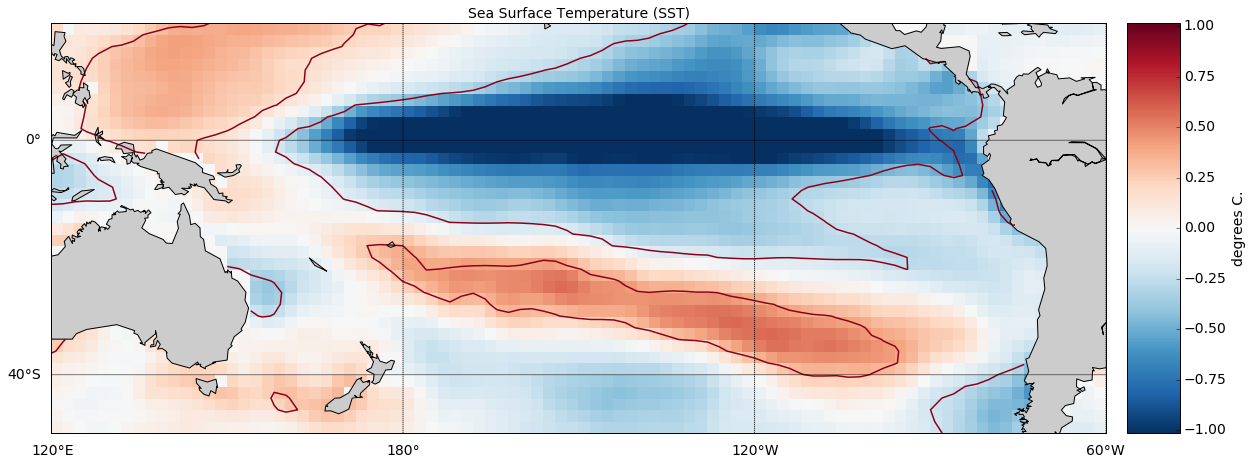

In [29]:
f = scalar_plot(sst, test=0.1, proj='cyl', domain=[120, 300, -50., 20]).plot()

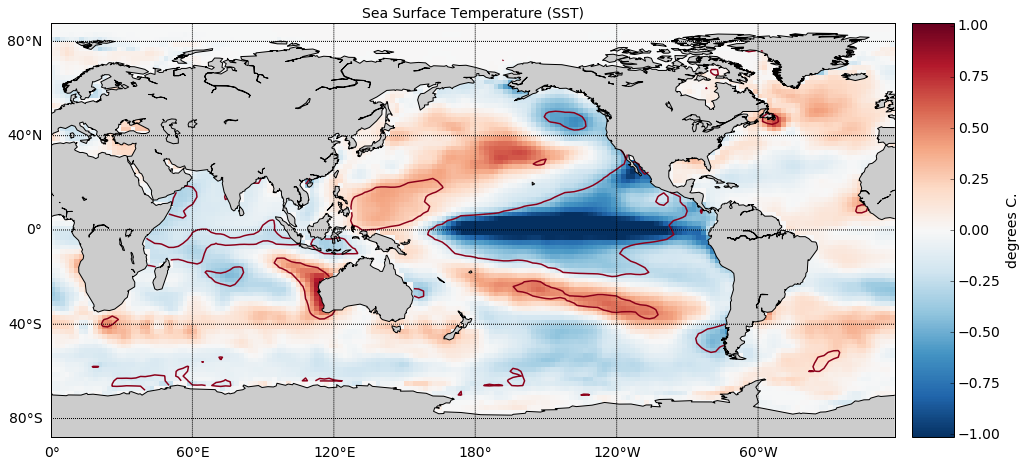

In [30]:
f = scalar_plot(sst, test=0.05, proj='cyl',proxies_loc=True).plot()

In [31]:
sst.locations

{'Washington Isl.': array([ 198.75,    3.75])}

### saves to file 

In [32]:
sst.save_to_file('/Users/nicolasf/Desktop/sst_composite.nc')

In [33]:
sst.close()

In [34]:
dset = xray.open_dataset('/Users/nicolasf/Desktop/sst_composite.nc')

In [35]:
dset

<xarray.Dataset>
Dimensions:              (latitudes: 89, longitudes: 180, years: 7)
Coordinates:
  * longitudes           (longitudes) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 ...
  * latitudes            (latitudes) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ...
  * years                (years) int32 1984 1989 1997 1999 2000 2008 2011
Data variables:
    composite_sample     (years, latitudes, longitudes) float64 nan nan nan ...
    composite_anomalies  (latitudes, longitudes) float64 0.0 0.0 0.0 0.0 0.0 ...
    pvalues              (latitudes, longitudes) float64 nan nan nan nan nan ...

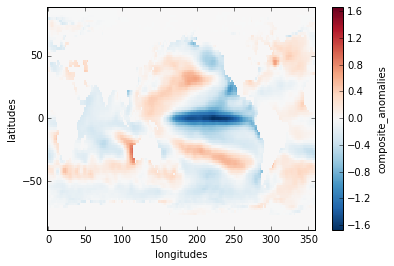

In [36]:
dset['composite_anomalies'].plot()

In [37]:
dset['years']

<xarray.DataArray 'years' (years: 7)>
array([1984, 1989, 1997, 1999, 2000, 2008, 2011], dtype=int32)
Coordinates:
  * years    (years) int32 1984 1989 1997 1999 2000 2008 2011

In [38]:
rain = analogs(p, 'gpcp', 'Rain').composite()

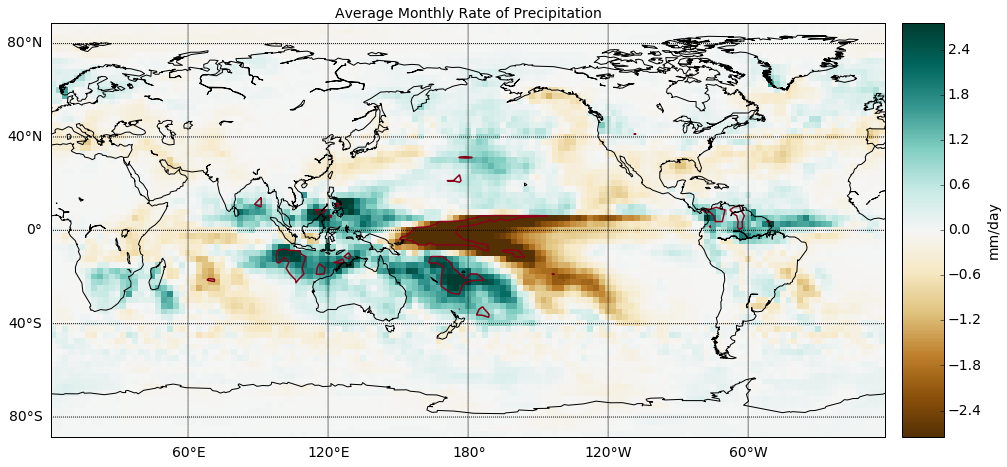

In [39]:
f = scalar_plot(rain, test=0.01, proj='cyl', proxies_loc=True).plot()

In [40]:
rain.locations

{'Washington Isl.': array([ 198.75,    3.75])}

In [41]:
198.75 - 360.

-161.25